# Trabalho Final de Probabilidade - Corelação e Regressão Linear


## 1) Descreva o conjunto de dados selecionado (variáveis aleatórias do estudo).
Dataset: https://archive.ics.uci.edu/ml/datasets/Computer+Hardware

Os valores estimados de desempenho relativo foram estimados pelos autores usando um método de regressão linear.
Temos os seguintes dados 

1.  Nome do Fabricante
2.  Nome do Modelo
3.  MYCT: tempo de ciclo da máquina em nanossegundos
4.  MMIN: memória principal mínima em kilobytes
5.  MMAX: memória principal máxima em kilobytes
6.  CACH: memória cache em kilobytes
7.  CHMIN: canais mínimos em unidades
8.  CHMAX: máximo de canais em unidades
9.  PRP: desempenho relativo publicado
10. ERP: desempenho relativo estimado do artigo original

In [12]:
import pandas as  pd
import numpy as   np
from sklearn import linear_model as skln
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
ColumnsNames = ['Marca','Modelo','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
df = pd.read_csv('machine.data.txt', names = ColumsNames)
df

,Marca,Modelo,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


## 2) Usando sua intuição, classifique os pares de variáveis aleatórias como tendo uma correlação fraca (0 < r < 0.5), uma correlação moderada (0.5 < r < 0.8) ou uma correlação forte (0.8 < r < 1.0).

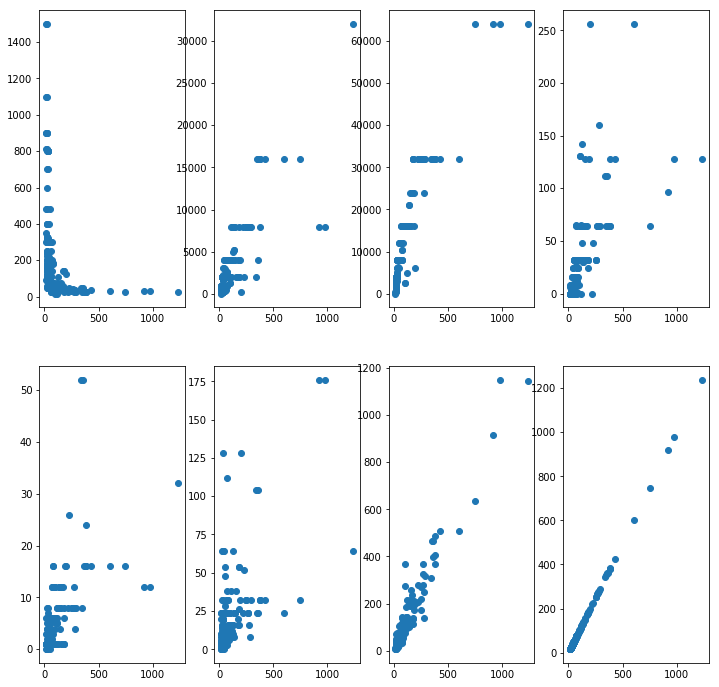

In [155]:
fig, axs = plt.subplots(2, 4, figsize=(12, 12))

axs[0, 0].scatter(df['ERP'], df['MYCT'])
axs[0, 1].scatter(df['ERP'], df['MMIN'])
axs[0, 2].scatter(df['ERP'], df['MMAX'])
axs[0, 3].scatter(df['ERP'], df['CACH'])
axs[1, 0].scatter(df['ERP'], df['CHMIN'])
axs[1, 1].scatter(df['ERP'], df['CHMAX'])
axs[1, 2].scatter(df['ERP'], df['PRP'])
axs[1, 3].scatter(df['ERP'], df['ERP'])
plt.show()

## 3)Agora, use uma ferramenta computacional para encontrar os coeficientes de correlação para cada par da questão 2. Compare seus resultados com aqueles obtidos por intuição


In [21]:
df.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


In [108]:
for column in df.columns:
    if column != 'Marca' and column != 'Modelo' and column != 'ERP':
        icorr = df['ERP'].corr(df[column])
        print('A correlação entre ERP e',column,'é:', icorr, end=" ")
        if icorr > 0 and icorr < 0.5:
            print('correlação fraca')
        elif icorr > 0.5 and icorr < 0.8:
            print('correlação moderada')
        else:
             print('correlação forte')

A correlação entre ERP e MYCT é: -0.288395603072946 correlação forte
A correlação entre ERP e MMIN é: 0.8192915433705638 correlação forte
A correlação entre ERP e MMAX é: 0.9012023724206504 correlação forte
A correlação entre ERP e CACH é: 0.6486202553696466 correlação moderada
A correlação entre ERP e CHMIN é: 0.6105802214479131 correlação moderada
A correlação entre ERP e CHMAX é: 0.5921555647418641 correlação moderada
A correlação entre ERP e PRP é: 0.9664716584437559 correlação forte


## 4)A partir dos resultados obtidos na questão 3, discuta sobre a correlação entre as variáveis.

## 5)Use uma ferramenta computacional para encontrar a linha de regressão para cada par da questão 2.

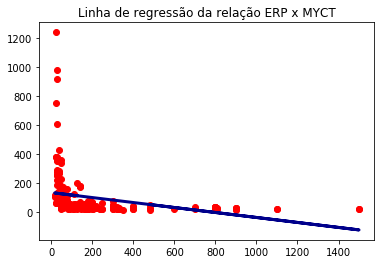

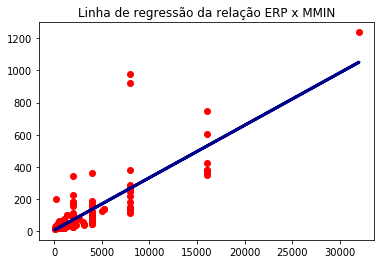

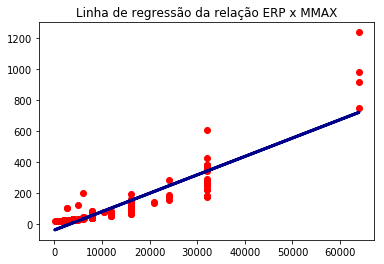

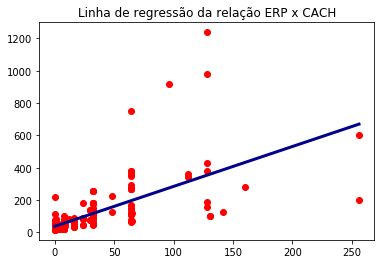

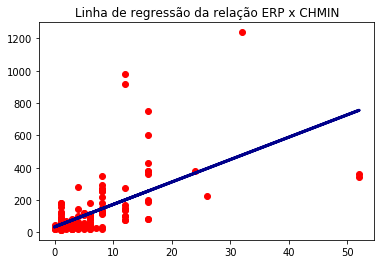

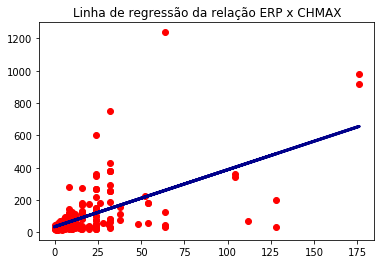

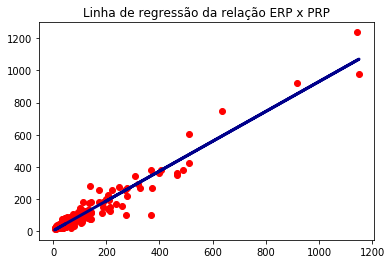

In [151]:
i=1
for column in ColumnsNames:
    y = df['ERP']
    if column != 'Marca' and column != 'Modelo' and column != 'ERP':
        x = df[column]
        x = x.values.reshape([x.shape[0], 1])
        regressao = skln.LinearRegression()
        regressao.fit(x, y)
        y_pred = regressao.predict(x)
        plt.figure(i)
        plt.scatter(x, y,  color='red')
        plt.plot(x, y_pred,  'darkblue', linewidth=3)
        plt.title('Linha de regressão da relação ERP x ' +  column)
        i = i + i

## 6)Com base nas retas de regressão encontradas na questão 5, dê exemplos de previsões.
